<a href="https://colab.research.google.com/github/imraunav/Computer-vision-EE511/blob/main/3_layer_mlp_ae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD, Adam
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor, Lambda, Compose
import numpy as np
from tqdm import tqdm
# from tqdm.notebook import tqdm
from torchsummary import summary

In [ ]:
train_dataset = MNIST(root = './',
      train = True,
      transform = ToTensor(),
      target_transform = Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)),
      download = True)
test_dataset = MNIST(root = './',
      train = False,
      transform = ToTensor(),
      target_transform = Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)),
      download = False)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size = 64, shuffle = True)
test_loader = DataLoader(test_dataset)

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Using device: ", device)

Using device:  cpu


In [ ]:
def trainer(model, train_loader, max_epoch, optimizer, crit, device, val=False, test_loader=None):
  train_loss = []
  val_loss = []

  for epoch in range(max_epoch):
    print(f"Epoch:{epoch+1}")
    running_loss = 0
    model.train()
    nbatch = 0
    for batch in tqdm(train_loader):
      img, label = batch
      img = img.to(device)

      optimizer.zero_grad()
      back = model(img)
      loss = crit(back, img)
      loss.backward()
      optimizer.step()
      running_loss += loss.item()
      nbatch += 1
    train_loss.append(running_loss/nbatch)
    if val:
      model.eval()
      runnging_loss = 0
      nbatch = 0
      for batch in test_loader:
        img, target = batch
        img = img.to(device)
        target = target.to(device)

        pred = model(img)
        loss = crit(pred, target)
        running_loss += loss.item()
        nbatch += 1
      val_loss.append(running_loss/nbatch)
      print(f"Train loss: {train_loss[-1]:.5f}, Val loss: {val_loss[-1]:.5f}")
    else:
      print(f"Train loss: {train_loss[-1]}")
  if val:
    return train_loss, val_loss
  return train_loss

In [ ]:
class MLP(nn.Module):
  def __init__(self, num_classes = 10):
    super().__init__()
    self.l1 = nn.Linear(28*28, 20)
    self.l2 = nn.Linear(20, num_classes)
  def forward(self, x):
    x = x.view(x.size(0), 28*28)
    x = F.sigmoid(self.l1(x))
    return F.sigmoid(self.l2(x))

class DeepBeliefNet1(nn.Module):
  def __init__(self):
    super().__init__()
    # encoder
    self.l1 = nn.Linear(28*28, 20)

    # decoder
    self.l2 = nn.Linear(20, 28*28)

  def forward(self, x):
    x = x.view(x.size(0), 28*28)
    x = F.sigmoid(self.l1(x))
    return self.l2(x).view(x.size(0), 1, 28, 28)

In [ ]:
dbn = DeepBeliefNet1().to(device)
summary(dbn, (28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 20]          15,700
            Linear-2                  [-1, 784]          16,464
Total params: 32,164
Trainable params: 32,164
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.12
Estimated Total Size (MB): 0.13
----------------------------------------------------------------


In [ ]:
optimizer = SGD(dbn.parameters(), lr=0.001, momentum=0.7, nesterov=True)
crit = nn.MSELoss()
max_epoch = 100

train_loss = trainer(dbn, train_loader, max_epoch, optimizer, crit, device)

Epoch:1


100%|██████████| 938/938 [00:12<00:00, 76.52it/s]


Train loss: 0.18725767741198224
Epoch:2


100%|██████████| 938/938 [00:11<00:00, 78.52it/s]


Train loss: 0.1605436986665736
Epoch:3


100%|██████████| 938/938 [00:12<00:00, 77.16it/s]


Train loss: 0.14687701719783264
Epoch:4


100%|██████████| 938/938 [00:12<00:00, 77.15it/s]


Train loss: 0.1387476233531163
Epoch:5


100%|██████████| 938/938 [00:12<00:00, 77.01it/s]


Train loss: 0.13328941925756457
Epoch:6


100%|██████████| 938/938 [00:12<00:00, 76.47it/s]


Train loss: 0.12928618295296931
Epoch:7


100%|██████████| 938/938 [00:12<00:00, 76.54it/s]


Train loss: 0.12616176671310783
Epoch:8


100%|██████████| 938/938 [00:12<00:00, 76.88it/s]


Train loss: 0.12359009987350975
Epoch:9


100%|██████████| 938/938 [00:12<00:00, 75.98it/s]


Train loss: 0.12138687229868192
Epoch:10


100%|██████████| 938/938 [00:12<00:00, 75.67it/s]


Train loss: 0.11946031892858842
Epoch:11


100%|██████████| 938/938 [00:12<00:00, 76.16it/s]


Train loss: 0.11771842776966501
Epoch:12


100%|██████████| 938/938 [00:12<00:00, 76.78it/s]


Train loss: 0.11613926741042371
Epoch:13


100%|██████████| 938/938 [00:12<00:00, 76.91it/s]


Train loss: 0.1146631942057152
Epoch:14


100%|██████████| 938/938 [00:11<00:00, 78.90it/s]


Train loss: 0.11329148940122458
Epoch:15


100%|██████████| 938/938 [00:12<00:00, 77.23it/s]


Train loss: 0.11198411979623187
Epoch:16


100%|██████████| 938/938 [00:12<00:00, 77.32it/s]


Train loss: 0.11073953272310147
Epoch:17


100%|██████████| 938/938 [00:12<00:00, 78.15it/s]


Train loss: 0.10955156780668159
Epoch:18


100%|██████████| 938/938 [00:12<00:00, 77.11it/s]


Train loss: 0.10839372810556182
Epoch:19


100%|██████████| 938/938 [00:12<00:00, 76.16it/s]


Train loss: 0.10728852905190067
Epoch:20


100%|██████████| 938/938 [00:12<00:00, 76.93it/s]


Train loss: 0.10620845548474966
Epoch:21


100%|██████████| 938/938 [00:12<00:00, 77.48it/s]


Train loss: 0.10516869724750011
Epoch:22


100%|██████████| 938/938 [00:12<00:00, 77.94it/s]


Train loss: 0.10414460963849574
Epoch:23


100%|██████████| 938/938 [00:12<00:00, 77.69it/s]


Train loss: 0.10314090864490598
Epoch:24


100%|██████████| 938/938 [00:12<00:00, 76.73it/s]


Train loss: 0.10216741421138809
Epoch:25


100%|██████████| 938/938 [00:12<00:00, 77.02it/s]


Train loss: 0.10119928904910332
Epoch:26


100%|██████████| 938/938 [00:12<00:00, 76.25it/s]


Train loss: 0.10026472939579471
Epoch:27


100%|██████████| 938/938 [00:12<00:00, 77.77it/s]


Train loss: 0.09934163830681905
Epoch:28


100%|██████████| 938/938 [00:12<00:00, 75.86it/s]


Train loss: 0.09843256975859721
Epoch:29


100%|██████████| 938/938 [00:12<00:00, 77.94it/s]


Train loss: 0.09754031425568341
Epoch:30


100%|██████████| 938/938 [00:12<00:00, 76.38it/s]


Train loss: 0.09666387048929231
Epoch:31


100%|██████████| 938/938 [00:12<00:00, 77.24it/s]


Train loss: 0.09580781523670469
Epoch:32


100%|██████████| 938/938 [00:12<00:00, 77.85it/s]


Train loss: 0.09496305245898172
Epoch:33


100%|██████████| 938/938 [00:12<00:00, 77.47it/s]


Train loss: 0.09413043967982344
Epoch:34


100%|██████████| 938/938 [00:11<00:00, 78.28it/s]


Train loss: 0.0933124178778261
Epoch:35


100%|██████████| 938/938 [00:11<00:00, 78.44it/s]


Train loss: 0.0925162874781755
Epoch:36


100%|██████████| 938/938 [00:12<00:00, 77.75it/s]


Train loss: 0.09172704046977355
Epoch:37


100%|██████████| 938/938 [00:11<00:00, 78.35it/s]


Train loss: 0.0909504020042511
Epoch:38


100%|██████████| 938/938 [00:12<00:00, 78.15it/s]


Train loss: 0.0901974677435879
Epoch:39


100%|██████████| 938/938 [00:12<00:00, 77.42it/s]


Train loss: 0.0894483770372898
Epoch:40


100%|██████████| 938/938 [00:12<00:00, 77.81it/s]


Train loss: 0.08872239516456244
Epoch:41


100%|██████████| 938/938 [00:11<00:00, 78.60it/s]


Train loss: 0.08800748677682012
Epoch:42


100%|██████████| 938/938 [00:12<00:00, 78.06it/s]


Train loss: 0.08731459086733077
Epoch:43


100%|██████████| 938/938 [00:12<00:00, 77.53it/s]


Train loss: 0.08662126639059611
Epoch:44


100%|██████████| 938/938 [00:11<00:00, 79.23it/s]


Train loss: 0.08596173495149562
Epoch:45


100%|██████████| 938/938 [00:11<00:00, 79.29it/s]


Train loss: 0.0852972318861149
Epoch:46


100%|██████████| 938/938 [00:12<00:00, 77.75it/s]


Train loss: 0.08466135102040223
Epoch:47


100%|██████████| 938/938 [00:11<00:00, 78.30it/s]


Train loss: 0.08404472815806169
Epoch:48


100%|██████████| 938/938 [00:12<00:00, 77.88it/s]


Train loss: 0.08342794967549187
Epoch:49


100%|██████████| 938/938 [00:11<00:00, 78.82it/s]


Train loss: 0.08283601100765058
Epoch:50


100%|██████████| 938/938 [00:12<00:00, 77.71it/s]


Train loss: 0.08225503410580062
Epoch:51


100%|██████████| 938/938 [00:11<00:00, 78.25it/s]


Train loss: 0.08169260600418933
Epoch:52


100%|██████████| 938/938 [00:11<00:00, 78.78it/s]


Train loss: 0.08114024897469387
Epoch:53


100%|██████████| 938/938 [00:12<00:00, 77.59it/s]


Train loss: 0.08061329620098
Epoch:54


100%|██████████| 938/938 [00:12<00:00, 77.70it/s]


Train loss: 0.0800898623412479
Epoch:55


100%|██████████| 938/938 [00:12<00:00, 77.29it/s]


Train loss: 0.07958637297089928
Epoch:56


100%|██████████| 938/938 [00:12<00:00, 76.53it/s]


Train loss: 0.07910302563357963
Epoch:57


100%|██████████| 938/938 [00:12<00:00, 77.04it/s]


Train loss: 0.07862291856011602
Epoch:58


100%|██████████| 938/938 [00:12<00:00, 77.38it/s]


Train loss: 0.07816302001889326
Epoch:59


100%|██████████| 938/938 [00:12<00:00, 77.34it/s]


Train loss: 0.0777167530059179
Epoch:60


100%|██████████| 938/938 [00:12<00:00, 76.44it/s]


Train loss: 0.07728792927952717
Epoch:61


100%|██████████| 938/938 [00:12<00:00, 77.88it/s]


Train loss: 0.07686872267202019
Epoch:62


100%|██████████| 938/938 [00:12<00:00, 78.16it/s]


Train loss: 0.07646872104008569
Epoch:63


100%|██████████| 938/938 [00:12<00:00, 76.73it/s]


Train loss: 0.07607651010219223
Epoch:64


100%|██████████| 938/938 [00:12<00:00, 77.07it/s]


Train loss: 0.07569939321451095
Epoch:65


100%|██████████| 938/938 [00:12<00:00, 77.64it/s]


Train loss: 0.07533085353370668
Epoch:66


100%|██████████| 938/938 [00:12<00:00, 76.90it/s]


Train loss: 0.07498170585552258
Epoch:67


100%|██████████| 938/938 [00:12<00:00, 77.46it/s]


Train loss: 0.07464754688682587
Epoch:68


100%|██████████| 938/938 [00:12<00:00, 77.66it/s]


Train loss: 0.07431503643454519
Epoch:69


100%|██████████| 938/938 [00:12<00:00, 77.84it/s]


Train loss: 0.07399835599574453
Epoch:70


100%|██████████| 938/938 [00:12<00:00, 75.84it/s]


Train loss: 0.07369571429357599
Epoch:71


100%|██████████| 938/938 [00:11<00:00, 78.29it/s]


Train loss: 0.07340923498180121
Epoch:72


100%|██████████| 938/938 [00:11<00:00, 78.37it/s]


Train loss: 0.07311946785907501
Epoch:73


100%|██████████| 938/938 [00:11<00:00, 78.94it/s]


Train loss: 0.07285213978019858
Epoch:74


100%|██████████| 938/938 [00:12<00:00, 76.69it/s]


Train loss: 0.07258706289663244
Epoch:75


100%|██████████| 938/938 [00:12<00:00, 77.77it/s]


Train loss: 0.07234222115452356
Epoch:76


100%|██████████| 938/938 [00:12<00:00, 77.24it/s]


Train loss: 0.07210077041946748
Epoch:77


100%|██████████| 938/938 [00:12<00:00, 77.58it/s]


Train loss: 0.07186582272272629
Epoch:78


100%|██████████| 938/938 [00:12<00:00, 77.04it/s]


Train loss: 0.07164134163814567
Epoch:79


100%|██████████| 938/938 [00:12<00:00, 77.17it/s]


Train loss: 0.07142931290431571
Epoch:80


100%|██████████| 938/938 [00:12<00:00, 76.81it/s]


Train loss: 0.07122466022939061
Epoch:81


100%|██████████| 938/938 [00:12<00:00, 77.83it/s]


Train loss: 0.07102480702308704
Epoch:82


100%|██████████| 938/938 [00:11<00:00, 78.26it/s]


Train loss: 0.07083742144996169
Epoch:83


100%|██████████| 938/938 [00:12<00:00, 77.79it/s]


Train loss: 0.07065503957715116
Epoch:84


100%|██████████| 938/938 [00:11<00:00, 78.24it/s]


Train loss: 0.07048316167266384
Epoch:85


100%|██████████| 938/938 [00:12<00:00, 77.55it/s]


Train loss: 0.07031468117732738
Epoch:86


100%|██████████| 938/938 [00:12<00:00, 76.99it/s]


Train loss: 0.0701544048713405
Epoch:87


100%|██████████| 938/938 [00:12<00:00, 76.64it/s]


Train loss: 0.07000332224820215
Epoch:88


100%|██████████| 938/938 [00:12<00:00, 77.34it/s]


Train loss: 0.06985393524773593
Epoch:89


100%|██████████| 938/938 [00:12<00:00, 78.10it/s]


Train loss: 0.06971182347313046
Epoch:90


100%|██████████| 938/938 [00:12<00:00, 77.56it/s]


Train loss: 0.06957990594351215
Epoch:91


100%|██████████| 938/938 [00:11<00:00, 78.56it/s]


Train loss: 0.06944559217055342
Epoch:92


100%|██████████| 938/938 [00:12<00:00, 77.20it/s]


Train loss: 0.06932097806065067
Epoch:93


100%|██████████| 938/938 [00:12<00:00, 77.71it/s]


Train loss: 0.06919958375727953
Epoch:94


100%|██████████| 938/938 [00:11<00:00, 78.57it/s]


Train loss: 0.06908639365120102
Epoch:95


100%|██████████| 938/938 [00:12<00:00, 77.42it/s]


Train loss: 0.0689787048973572
Epoch:96


100%|██████████| 938/938 [00:11<00:00, 80.06it/s]


Train loss: 0.06887168064316325
Epoch:97


100%|██████████| 938/938 [00:11<00:00, 78.94it/s]


Train loss: 0.06877084707082716
Epoch:98


100%|██████████| 938/938 [00:11<00:00, 81.06it/s]


Train loss: 0.06867146161573529
Epoch:99


100%|██████████| 938/938 [00:12<00:00, 77.96it/s]


Train loss: 0.06858045995426076
Epoch:100


100%|██████████| 938/938 [00:12<00:00, 77.76it/s]

Train loss: 0.06849307537491896


In [ ]:
def trainer_mlp(model, train_loader, max_epoch, optimizer, crit, device, val=False, test_loader=None):
  train_loss = []
  val_loss = []

  for epoch in range(max_epoch):
    print(f"Epoch:{epoch+1}")
    running_loss = 0
    model.train()
    nbatch = 0
    for batch in tqdm(train_loader):
      img, label = batch
      img = img.to(device)
      label = label.to(device)

      pred = model(img)

      optimizer.zero_grad()
      loss = crit(pred, label)
      loss.backward()
      optimizer.step()

      running_loss += loss.item()
      nbatch += 1
    train_loss.append(running_loss/nbatch)
    if val:
      model.eval()
      runnging_loss = 0
      nbatch = 0
      for batch in test_loader:
        img, target = batch
        img = img.to(device)
        target = target.to(device)

        pred = model(img)
        loss = crit(pred, target)
        running_loss += loss.item()
        nbatch += 1
      val_loss.append(running_loss/nbatch)
      print(f"Train loss: {train_loss[-1]:.5f}, Val loss: {val_loss[-1]:.5f}")
    else:
      print(f"Train loss: {train_loss[-1]}")
  if val:
    return train_loss, val_loss
  return train_loss

In [ ]:
model = MLP().to(device)
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.5)
crit = nn.MSELoss()

In [ ]:
with torch.no_grad():
  model.l1.weight.copy_(dbn.l1.weight)
  model.l1.bias.copy_(dbn.l1.bias)

In [ ]:
model.l1.weight.requires_grad = True
model.l1.bias.requires_grad = True

In [ ]:
model.l1.bias

Parameter containing:
tensor([-0.0569, -0.0505, -0.0388, -0.0813, -0.0588, -0.0298, -0.0773, -0.0613,
        -0.0647, -0.0421, -0.0654, -0.0737, -0.0837, -0.0536, -0.0453, -0.0760,
        -0.0335, -0.1143, -0.0835, -0.0552], requires_grad=True)

In [ ]:
max_epoch = 100
train_loss, val_loss = trainer_mlp(model, train_loader, max_epoch, optimizer, crit, device, val=True, test_loader=test_loader)

Epoch:1


100%|██████████| 938/938 [00:11<00:00, 81.81it/s]


Train loss: 0.15198, Val loss: 0.12267
Epoch:2


100%|██████████| 938/938 [00:11<00:00, 81.97it/s]


Train loss: 0.09895, Val loss: 0.10301
Epoch:3


100%|██████████| 938/938 [00:11<00:00, 82.24it/s]


Train loss: 0.09207, Val loss: 0.09952
Epoch:4


100%|██████████| 938/938 [00:11<00:00, 81.06it/s]


Train loss: 0.09039, Val loss: 0.09844
Epoch:5


100%|██████████| 938/938 [00:11<00:00, 81.72it/s]


Train loss: 0.08978, Val loss: 0.09798
Epoch:6


100%|██████████| 938/938 [00:11<00:00, 82.33it/s]


Train loss: 0.08947, Val loss: 0.09772
Epoch:7


100%|██████████| 938/938 [00:11<00:00, 81.75it/s]


Train loss: 0.08928, Val loss: 0.09754
Epoch:8


100%|██████████| 938/938 [00:11<00:00, 82.25it/s]


Train loss: 0.08913, Val loss: 0.09739
Epoch:9


100%|██████████| 938/938 [00:11<00:00, 80.33it/s]


Train loss: 0.08900, Val loss: 0.09725
Epoch:10


100%|██████████| 938/938 [00:11<00:00, 80.61it/s]


Train loss: 0.08887, Val loss: 0.09711
Epoch:11


100%|██████████| 938/938 [00:11<00:00, 79.89it/s]


Train loss: 0.08874, Val loss: 0.09696
Epoch:12


100%|██████████| 938/938 [00:11<00:00, 80.23it/s]


Train loss: 0.08860, Val loss: 0.09681
Epoch:13


100%|██████████| 938/938 [00:11<00:00, 80.88it/s]


Train loss: 0.08846, Val loss: 0.09664
Epoch:14


100%|██████████| 938/938 [00:11<00:00, 81.95it/s]


Train loss: 0.08831, Val loss: 0.09646
Epoch:15


100%|██████████| 938/938 [00:11<00:00, 79.68it/s]


Train loss: 0.08814, Val loss: 0.09627
Epoch:16


100%|██████████| 938/938 [00:11<00:00, 79.17it/s]


Train loss: 0.08797, Val loss: 0.09606
Epoch:17


100%|██████████| 938/938 [00:11<00:00, 78.87it/s]


Train loss: 0.08777, Val loss: 0.09584
Epoch:18


100%|██████████| 938/938 [00:11<00:00, 79.01it/s]


Train loss: 0.08756, Val loss: 0.09559
Epoch:19


100%|██████████| 938/938 [00:11<00:00, 79.76it/s]


Train loss: 0.08734, Val loss: 0.09533
Epoch:20


100%|██████████| 938/938 [00:11<00:00, 79.61it/s]


Train loss: 0.08709, Val loss: 0.09503
Epoch:21


100%|██████████| 938/938 [00:11<00:00, 78.69it/s]


Train loss: 0.08681, Val loss: 0.09471
Epoch:22


100%|██████████| 938/938 [00:11<00:00, 80.95it/s]


Train loss: 0.08652, Val loss: 0.09437
Epoch:23


100%|██████████| 938/938 [00:11<00:00, 80.14it/s]


Train loss: 0.08619, Val loss: 0.09399
Epoch:24


100%|██████████| 938/938 [00:11<00:00, 79.96it/s]


Train loss: 0.08584, Val loss: 0.09358
Epoch:25


100%|██████████| 938/938 [00:11<00:00, 81.92it/s]


Train loss: 0.08546, Val loss: 0.09313
Epoch:26


100%|██████████| 938/938 [00:11<00:00, 81.36it/s]


Train loss: 0.08505, Val loss: 0.09265
Epoch:27


100%|██████████| 938/938 [00:11<00:00, 80.69it/s]


Train loss: 0.08461, Val loss: 0.09214
Epoch:28


100%|██████████| 938/938 [00:11<00:00, 81.20it/s]


Train loss: 0.08414, Val loss: 0.09160
Epoch:29


100%|██████████| 938/938 [00:11<00:00, 81.62it/s]


Train loss: 0.08365, Val loss: 0.09103
Epoch:30


100%|██████████| 938/938 [00:11<00:00, 80.41it/s]


Train loss: 0.08312, Val loss: 0.09043
Epoch:31


100%|██████████| 938/938 [00:11<00:00, 82.31it/s]


Train loss: 0.08258, Val loss: 0.08980
Epoch:32


100%|██████████| 938/938 [00:11<00:00, 81.05it/s]


Train loss: 0.08201, Val loss: 0.08915
Epoch:33


100%|██████████| 938/938 [00:11<00:00, 80.53it/s]


Train loss: 0.08142, Val loss: 0.08848
Epoch:34


100%|██████████| 938/938 [00:11<00:00, 83.75it/s]


Train loss: 0.08082, Val loss: 0.08780
Epoch:35


100%|██████████| 938/938 [00:11<00:00, 80.46it/s]


Train loss: 0.08020, Val loss: 0.08711
Epoch:36


100%|██████████| 938/938 [00:11<00:00, 81.00it/s]


Train loss: 0.07957, Val loss: 0.08640
Epoch:37


100%|██████████| 938/938 [00:11<00:00, 82.02it/s]


Train loss: 0.07894, Val loss: 0.08569
Epoch:38


100%|██████████| 938/938 [00:11<00:00, 80.62it/s]


Train loss: 0.07831, Val loss: 0.08498
Epoch:39


100%|██████████| 938/938 [00:11<00:00, 79.69it/s]


Train loss: 0.07767, Val loss: 0.08427
Epoch:40


100%|██████████| 938/938 [00:11<00:00, 82.34it/s]


Train loss: 0.07702, Val loss: 0.08355
Epoch:41


100%|██████████| 938/938 [00:11<00:00, 79.33it/s]


Train loss: 0.07638, Val loss: 0.08284
Epoch:42


100%|██████████| 938/938 [00:11<00:00, 80.24it/s]


Train loss: 0.07574, Val loss: 0.08213
Epoch:43


100%|██████████| 938/938 [00:11<00:00, 81.59it/s]


Train loss: 0.07510, Val loss: 0.08142
Epoch:44


100%|██████████| 938/938 [00:11<00:00, 81.10it/s]


Train loss: 0.07446, Val loss: 0.08071
Epoch:45


100%|██████████| 938/938 [00:11<00:00, 80.08it/s]


Train loss: 0.07382, Val loss: 0.08000
Epoch:46


100%|██████████| 938/938 [00:11<00:00, 82.46it/s]


Train loss: 0.07318, Val loss: 0.07929
Epoch:47


100%|██████████| 938/938 [00:11<00:00, 80.76it/s]


Train loss: 0.07254, Val loss: 0.07857
Epoch:48


100%|██████████| 938/938 [00:11<00:00, 80.96it/s]


Train loss: 0.07189, Val loss: 0.07786
Epoch:49


100%|██████████| 938/938 [00:11<00:00, 83.08it/s]


Train loss: 0.07124, Val loss: 0.07714
Epoch:50


100%|██████████| 938/938 [00:11<00:00, 81.89it/s]


Train loss: 0.07059, Val loss: 0.07642
Epoch:51


100%|██████████| 938/938 [00:11<00:00, 80.61it/s]


Train loss: 0.06993, Val loss: 0.07570
Epoch:52


100%|██████████| 938/938 [00:11<00:00, 82.67it/s]


Train loss: 0.06927, Val loss: 0.07497
Epoch:53


100%|██████████| 938/938 [00:11<00:00, 81.39it/s]


Train loss: 0.06861, Val loss: 0.07424
Epoch:54


100%|██████████| 938/938 [00:11<00:00, 81.00it/s]


Train loss: 0.06794, Val loss: 0.07351
Epoch:55


100%|██████████| 938/938 [00:11<00:00, 82.93it/s]


Train loss: 0.06727, Val loss: 0.07278
Epoch:56


100%|██████████| 938/938 [00:11<00:00, 80.33it/s]


Train loss: 0.06660, Val loss: 0.07205
Epoch:57


100%|██████████| 938/938 [00:11<00:00, 79.37it/s]


Train loss: 0.06593, Val loss: 0.07131
Epoch:58


100%|██████████| 938/938 [00:11<00:00, 83.55it/s]


Train loss: 0.06526, Val loss: 0.07057
Epoch:59


100%|██████████| 938/938 [00:11<00:00, 80.71it/s]


Train loss: 0.06459, Val loss: 0.06984
Epoch:60


100%|██████████| 938/938 [00:11<00:00, 79.54it/s]


Train loss: 0.06392, Val loss: 0.06911
Epoch:61


100%|██████████| 938/938 [00:11<00:00, 83.37it/s]


Train loss: 0.06326, Val loss: 0.06838
Epoch:62


100%|██████████| 938/938 [00:11<00:00, 80.70it/s]


Train loss: 0.06259, Val loss: 0.06765
Epoch:63


100%|██████████| 938/938 [00:11<00:00, 80.39it/s]


Train loss: 0.06192, Val loss: 0.06693
Epoch:64


100%|██████████| 938/938 [00:11<00:00, 81.67it/s]


Train loss: 0.06127, Val loss: 0.06622
Epoch:65


100%|██████████| 938/938 [00:11<00:00, 81.35it/s]


Train loss: 0.06062, Val loss: 0.06551
Epoch:66


100%|██████████| 938/938 [00:11<00:00, 80.94it/s]


Train loss: 0.05997, Val loss: 0.06481
Epoch:67


100%|██████████| 938/938 [00:11<00:00, 82.85it/s]


Train loss: 0.05933, Val loss: 0.06411
Epoch:68


100%|██████████| 938/938 [00:11<00:00, 80.86it/s]


Train loss: 0.05870, Val loss: 0.06342
Epoch:69


100%|██████████| 938/938 [00:11<00:00, 79.47it/s]


Train loss: 0.05808, Val loss: 0.06275
Epoch:70


100%|██████████| 938/938 [00:11<00:00, 80.46it/s]


Train loss: 0.05747, Val loss: 0.06208
Epoch:71


100%|██████████| 938/938 [00:11<00:00, 80.09it/s]


Train loss: 0.05686, Val loss: 0.06142
Epoch:72


100%|██████████| 938/938 [00:11<00:00, 80.48it/s]


Train loss: 0.05626, Val loss: 0.06077
Epoch:73


100%|██████████| 938/938 [00:11<00:00, 79.90it/s]


Train loss: 0.05569, Val loss: 0.06013
Epoch:74


100%|██████████| 938/938 [00:11<00:00, 79.29it/s]


Train loss: 0.05510, Val loss: 0.05951
Epoch:75


100%|██████████| 938/938 [00:11<00:00, 81.18it/s]


Train loss: 0.05454, Val loss: 0.05889
Epoch:76


100%|██████████| 938/938 [00:11<00:00, 81.17it/s]


Train loss: 0.05399, Val loss: 0.05828
Epoch:77


100%|██████████| 938/938 [00:11<00:00, 80.75it/s]


Train loss: 0.05344, Val loss: 0.05769
Epoch:78


100%|██████████| 938/938 [00:11<00:00, 79.90it/s]


Train loss: 0.05291, Val loss: 0.05710
Epoch:79


100%|██████████| 938/938 [00:11<00:00, 79.54it/s]


Train loss: 0.05238, Val loss: 0.05653
Epoch:80


100%|██████████| 938/938 [00:11<00:00, 79.76it/s]


Train loss: 0.05186, Val loss: 0.05597
Epoch:81


100%|██████████| 938/938 [00:11<00:00, 81.73it/s]


Train loss: 0.05135, Val loss: 0.05541
Epoch:82


100%|██████████| 938/938 [00:11<00:00, 80.38it/s]


Train loss: 0.05086, Val loss: 0.05487
Epoch:83


100%|██████████| 938/938 [00:11<00:00, 79.80it/s]


Train loss: 0.05036, Val loss: 0.05433
Epoch:84


100%|██████████| 938/938 [00:11<00:00, 79.46it/s]


Train loss: 0.04990, Val loss: 0.05381
Epoch:85


100%|██████████| 938/938 [00:11<00:00, 80.97it/s]


Train loss: 0.04942, Val loss: 0.05329
Epoch:86


100%|██████████| 938/938 [00:11<00:00, 80.38it/s]


Train loss: 0.04896, Val loss: 0.05279
Epoch:87


100%|██████████| 938/938 [00:11<00:00, 82.28it/s]


Train loss: 0.04851, Val loss: 0.05229
Epoch:88


100%|██████████| 938/938 [00:11<00:00, 80.53it/s]


Train loss: 0.04806, Val loss: 0.05180
Epoch:89


100%|██████████| 938/938 [00:11<00:00, 79.69it/s]


Train loss: 0.04762, Val loss: 0.05132
Epoch:90


100%|██████████| 938/938 [00:11<00:00, 84.68it/s]


Train loss: 0.04719, Val loss: 0.05085
Epoch:91


100%|██████████| 938/938 [00:11<00:00, 78.96it/s]


Train loss: 0.04677, Val loss: 0.05039
Epoch:92


100%|██████████| 938/938 [00:11<00:00, 80.00it/s]


Train loss: 0.04636, Val loss: 0.04994
Epoch:93


100%|██████████| 938/938 [00:11<00:00, 84.82it/s]


Train loss: 0.04595, Val loss: 0.04949
Epoch:94


100%|██████████| 938/938 [00:11<00:00, 80.16it/s]


Train loss: 0.04555, Val loss: 0.04905
Epoch:95


100%|██████████| 938/938 [00:11<00:00, 79.76it/s]


Train loss: 0.04516, Val loss: 0.04861
Epoch:96


100%|██████████| 938/938 [00:11<00:00, 81.61it/s]


Train loss: 0.04477, Val loss: 0.04819
Epoch:97


100%|██████████| 938/938 [00:11<00:00, 81.28it/s]


Train loss: 0.04438, Val loss: 0.04777
Epoch:98


100%|██████████| 938/938 [00:11<00:00, 80.77it/s]


Train loss: 0.04401, Val loss: 0.04736
Epoch:99


100%|██████████| 938/938 [00:10<00:00, 85.45it/s]


Train loss: 0.04364, Val loss: 0.04695
Epoch:100


100%|██████████| 938/938 [00:11<00:00, 79.48it/s]


Train loss: 0.04328, Val loss: 0.04655


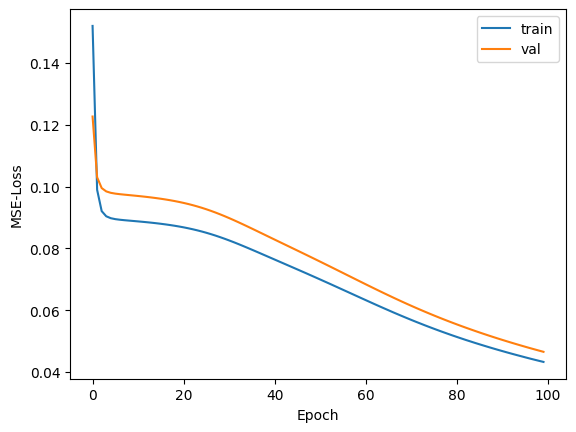

In [ ]:
from matplotlib import pyplot as plt

plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(['train', 'val'])
plt.xlabel('Epoch')
plt.ylabel('MSE-Loss')
plt.show()